In [15]:
#import pandas
import pandas as pd

# load dataset with proper headers
pima = pd.read_csv("diabetes.csv")

# Display the first few rows and column names to verify
print("Dataset shape:", pima.shape)
print("\nColumn names:", pima.columns.tolist())
print("\nFirst 5 rows:")
print(pima.head())

Dataset shape: (768, 9)

Column names: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

First 5 rows:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [16]:
#split dataset in features and target variable
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age', 'Glucose', 'BloodPressure', 'DiabetesPedigreeFunction']
X = pima[feature_cols] # Features
y = pima['Outcome'] # Target variable

print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (768, 7)
Target shape: (768,)


In [17]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
# it is 75 25 %
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [18]:
#import pandas
import pandas as pd
col_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
# load dataset
pima = pd.read_csv("diabetes.csv", header=None, names=col_names)

In [19]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


In [20]:
#split dataset in features and target variable
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age', 'Glucose', 'BloodPressure', 'DiabetesPedigreeFunction']
X = pima[feature_cols] # Features
# y = pima.label # Target variable


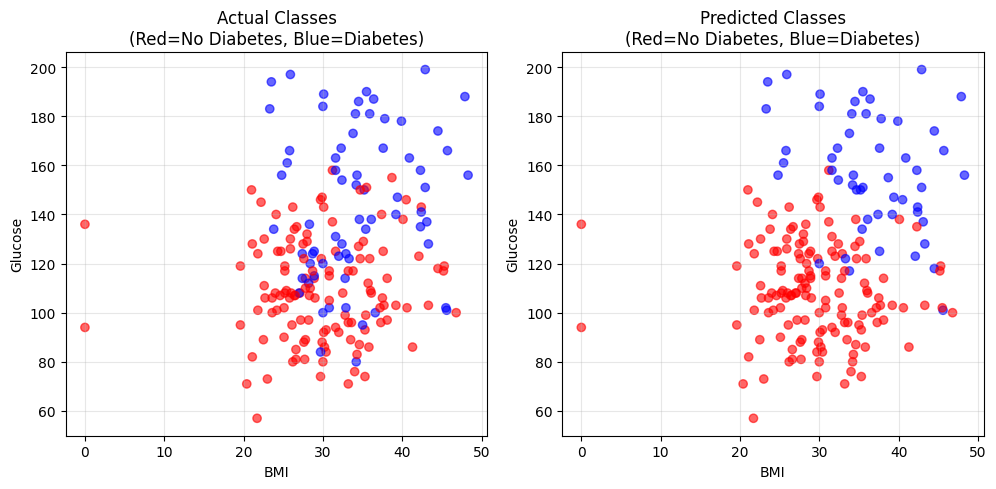

In [24]:
# Create scatter plot with two variables
import matplotlib.pyplot as plt
import numpy as np

# Predict y_pred using LogisticRegression if not already defined
from sklearn.linear_model import LogisticRegression

# Train the model on training data
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Predict the labels for test set
y_pred = logreg.predict(X_test)

# Choose two variables for scatter plot
var1 = 'BMI'
var2 = 'Glucose'

# Create figure with subplots
plt.figure(figsize=(15, 5))

# Plot 1: Actual vs Predicted on test data
plt.subplot(1, 3, 1)
colors = ['red' if x == 0 else 'blue' for x in y_test]
plt.scatter(X_test[var1], X_test[var2], c=colors, alpha=0.6)
plt.xlabel(var1)
plt.ylabel(var2)
plt.title('Actual Classes\n(Red=No Diabetes, Blue=Diabetes)')
plt.grid(True, alpha=0.3)

# Plot 2: Predicted classes
plt.subplot(1, 3, 2)
colors_pred = ['red' if x == 0 else 'blue' for x in y_pred]
plt.scatter(X_test[var1], X_test[var2], c=colors_pred, alpha=0.6)
plt.xlabel(var1)
plt.ylabel(var2)
plt.title('Predicted Classes\n(Red=No Diabetes, Blue=Diabetes)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


Text(0.5, 427.9555555555555, 'Predicted label')

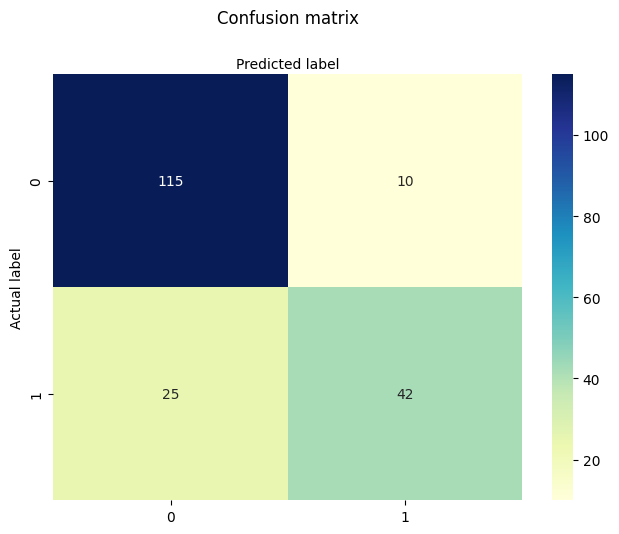

In [26]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [27]:
from sklearn.metrics import classification_report
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.82      0.92      0.87       125
   with diabetes       0.81      0.63      0.71        67

        accuracy                           0.82       192
       macro avg       0.81      0.77      0.79       192
    weighted avg       0.82      0.82      0.81       192



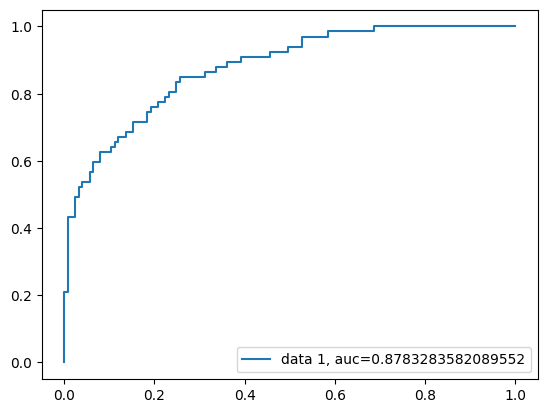

In [29]:
from sklearn import metrics

y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()